In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [6]:
df = pd.read_csv(r'/kaggle/input/apple-watch-and-fitbit-data/aw_fb_data.csv')
fb_df = pd.read_csv(r'/kaggle/input/apple-watch-and-fitbit-data/data_for_weka_fb.csv')
aw_df = pd.read_csv(r'/kaggle/input/apple-watch-and-fitbit-data/data_for_weka_aw.csv')

df.shape

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/apple-watch-and-fitbit-data/aw_fb_data.csv'

In [5]:
aw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              3656 non-null   int64  
 1   age                                     3656 non-null   int64  
 2   gender                                  3656 non-null   int64  
 3   height                                  3656 non-null   float64
 4   weight                                  3656 non-null   float64
 5   Applewatch.Steps_LE                     3656 non-null   float64
 6   Applewatch.Heart_LE                     3656 non-null   float64
 7   Applewatch.Calories_LE                  3656 non-null   float64
 8   Applewatch.Distance_LE                  3656 non-null   float64
 9   EntropyApplewatchHeartPerDay_LE         3656 non-null   float64
 10  EntropyApplewatchStepsPerDay_LE         3656 non-null   floa

In [6]:
aw_df.isnull().sum()

Unnamed: 0                                0
age                                       0
gender                                    0
height                                    0
weight                                    0
Applewatch.Steps_LE                       0
Applewatch.Heart_LE                       0
Applewatch.Calories_LE                    0
Applewatch.Distance_LE                    0
EntropyApplewatchHeartPerDay_LE           0
EntropyApplewatchStepsPerDay_LE           0
RestingApplewatchHeartrate_LE             0
CorrelationApplewatchHeartrateSteps_LE    0
NormalizedApplewatchHeartrate_LE          0
ApplewatchIntensity_LE                    0
SDNormalizedApplewatchHR_LE               0
ApplewatchStepsXDistance_LE               0
activity_trimmed                          0
dtype: int64

In [7]:
aw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3656.0,1834.915208,1061.462578,1.000000,914.750000,1832.500000,2756.250000,3670.000000
age,3656.0,29.408096,9.037922,18.000000,23.000000,28.000000,33.000000,56.000000
gender,3656.0,0.473468,0.499364,0.000000,0.000000,0.000000,1.000000,1.000000
height,3656.0,169.879595,10.428342,143.000000,160.000000,168.000000,180.000000,191.000000
weight,3656.0,70.611461,14.124498,43.000000,60.500000,70.000000,79.300000,115.000000
Applewatch.Steps_LE,3656.0,180.246421,269.437917,1.000000,10.771429,60.133571,203.273333,1714.000000
Applewatch.Heart_LE,3656.0,91.250821,26.753167,33.000000,75.457510,83.624783,102.517857,194.333333
Applewatch.Calories_LE,3656.0,5.783917,7.278513,0.056269,0.459917,0.756000,13.807992,29.242000
Applewatch.Distance_LE,3656.0,0.084236,0.136905,0.000440,0.007865,0.030825,0.080943,1.087790
EntropyApplewatchHeartPerDay_LE,3656.0,6.123775,0.215706,5.118769,6.075165,6.175485,6.228819,6.408318


In [8]:
# Max distance is 1.08 meters sounds too low.


In [9]:
aw_df.duplicated().sum()

0

In [10]:
label_encoder = LabelEncoder()

In [11]:
aw_df['activity_encoded'] = label_encoder.fit_transform(aw_df['activity_trimmed'])

In [12]:
activity_df = aw_df[['activity_encoded','activity_trimmed']].drop_duplicates().sort_values('activity_encoded')
activity_df

,activity_encoded,activity_trimmed
0,0,Lying
26,1,Running 3 METs
45,2,Running 5 METs
63,3,Running 7 METs
10,4,Self Pace walk
5,5,Sitting


In [13]:
aw_df.head()

,Unnamed: 0,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE,activity_trimmed,activity_encoded
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,Lying,0
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,Lying,0
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,Lying,0
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,Lying,0
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,Lying,0


In [14]:
aw_df.columns

Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight',
       'Applewatch.Steps_LE', 'Applewatch.Heart_LE', 'Applewatch.Calories_LE',
       'Applewatch.Distance_LE', 'EntropyApplewatchHeartPerDay_LE',
       'EntropyApplewatchStepsPerDay_LE', 'RestingApplewatchHeartrate_LE',
       'CorrelationApplewatchHeartrateSteps_LE',
       'NormalizedApplewatchHeartrate_LE', 'ApplewatchIntensity_LE',
       'SDNormalizedApplewatchHR_LE', 'ApplewatchStepsXDistance_LE',
       'activity_trimmed', 'activity_encoded'],
      dtype='object')

In [15]:
aw_df = aw_df[['age', 'gender', 'height', 'weight',
       'Applewatch.Steps_LE', 'Applewatch.Heart_LE', 'Applewatch.Calories_LE',
       'Applewatch.Distance_LE', 'EntropyApplewatchHeartPerDay_LE',
       'EntropyApplewatchStepsPerDay_LE', 'RestingApplewatchHeartrate_LE',
       'CorrelationApplewatchHeartrateSteps_LE',
       'NormalizedApplewatchHeartrate_LE', 'ApplewatchIntensity_LE',
       'SDNormalizedApplewatchHR_LE', 'ApplewatchStepsXDistance_LE',
     'activity_encoded']]

In [16]:
# Per preprint, features like age, gender, height, weight, steps, heartrate, calories and distance are collected from experiment. Other features like intesity, resting heart rate etc are engineered features that can contribute to explain activites

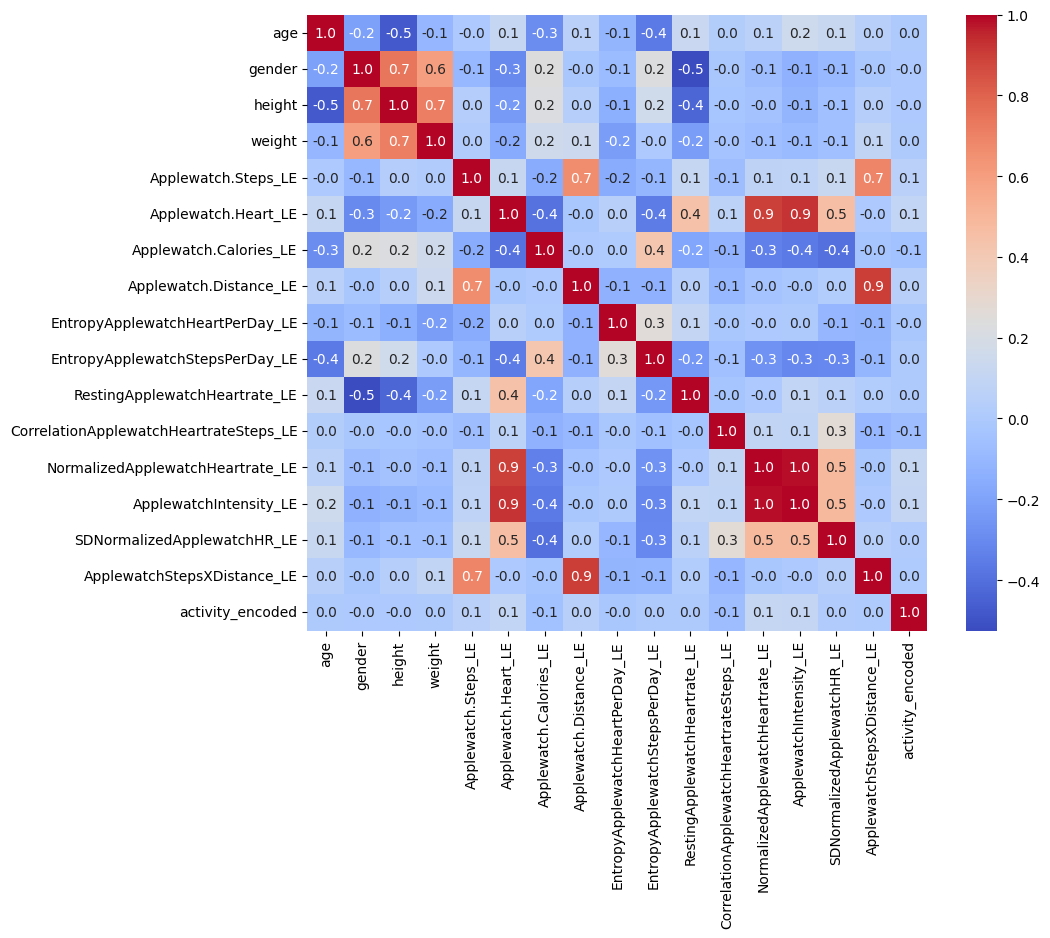

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(aw_df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.show()

In [18]:
# EDA

In [19]:
aw_df.head()

,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE,activity_encoded
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,0
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,0
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,0
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,0
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,0


In [20]:
aw_df.gender.value_counts()

gender
0    1925
1    1731
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

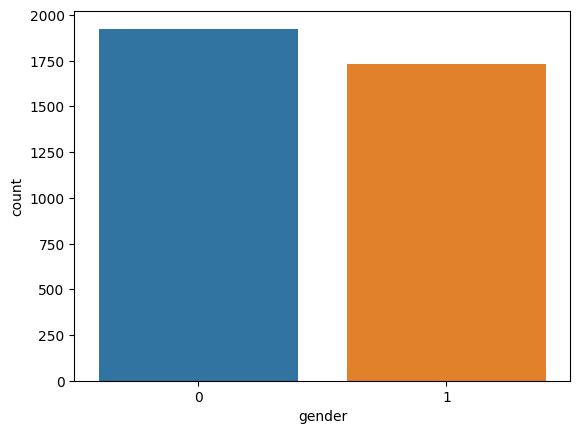

In [21]:
sns.countplot(x='gender', data=aw_df)

In [ ]:
sns.countplot(x='activity_encoded', data=aw_df)

<Axes: xlabel='activity_encoded', ylabel='count'>

In [ ]:
# data distribution 

<Axes: xlabel='height', ylabel='weight'>

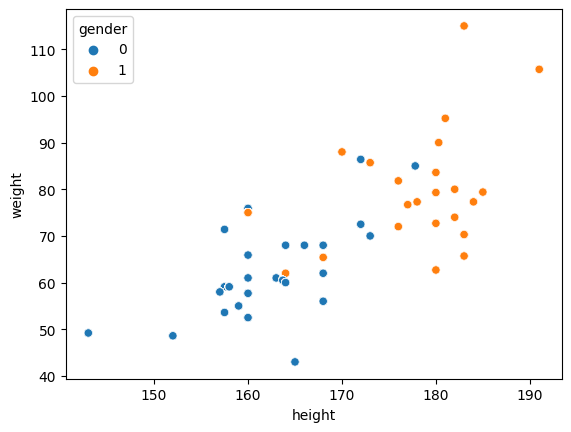

In [24]:
sns.scatterplot(x='height', y='weight', data=aw_df, hue='gender')

<Axes: xlabel='age', ylabel='weight'>

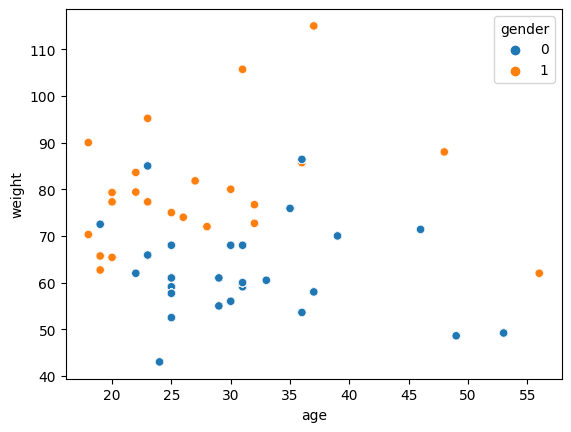

In [25]:
sns.scatterplot(x='age', y='weight', data=aw_df, hue='gender')

<Axes: xlabel='age', ylabel='height'>

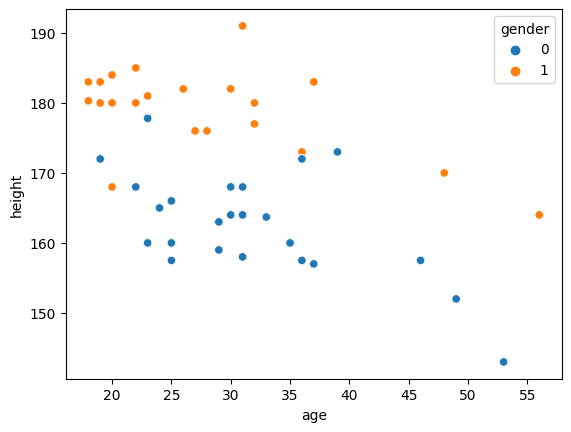

In [26]:
sns.scatterplot(x='age', y='height', data=aw_df, hue='gender')

In [27]:
# looking at age vs height vs weight gender = 0 is women and gender = 1 is men

In [28]:
# sns.pairplot(aw_df)

In [29]:
# this pair plot can give lot of insights about relationships b/w our data points, however, it is too big to interpret.
# Let's try to look distrubtion of the features by plotting historgram and then scatter plots.

In [30]:
aw_df.columns

Index(['age', 'gender', 'height', 'weight', 'Applewatch.Steps_LE',
       'Applewatch.Heart_LE', 'Applewatch.Calories_LE',
       'Applewatch.Distance_LE', 'EntropyApplewatchHeartPerDay_LE',
       'EntropyApplewatchStepsPerDay_LE', 'RestingApplewatchHeartrate_LE',
       'CorrelationApplewatchHeartrateSteps_LE',
       'NormalizedApplewatchHeartrate_LE', 'ApplewatchIntensity_LE',
       'SDNormalizedApplewatchHR_LE', 'ApplewatchStepsXDistance_LE',
       'activity_encoded'],
      dtype='object')

In [31]:
# for i in ['age', 'height', 'weight','Applewatch.Steps_LE',
#        'Applewatch.Heart_LE', 'Applewatch.Calories_LE',
#        'Applewatch.Distance_LE']:
#     sns.histplot(aw_df[i], kde=True, stat="density")
#     plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Applewatch.Distance_LE', ylabel='Density'>

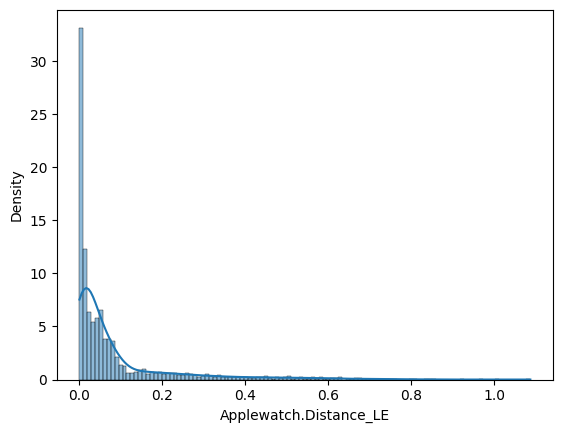

In [32]:
sns.histplot(aw_df['Applewatch.Distance_LE'], kde=True, stat="density")

In [33]:
aw_df['Applewatch.Distance_LE'].value_counts().reset_index()

,Applewatch.Distance_LE,count
0,0.008327,42
1,0.003040,10
2,0.003139,5
3,0.002941,5
4,0.003357,5
...,...,...
3485,0.533149,1
3486,0.577104,1
3487,0.621060,1
3488,0.720390,1


In [34]:
aw_df.columns

Index(['age', 'gender', 'height', 'weight', 'Applewatch.Steps_LE',
       'Applewatch.Heart_LE', 'Applewatch.Calories_LE',
       'Applewatch.Distance_LE', 'EntropyApplewatchHeartPerDay_LE',
       'EntropyApplewatchStepsPerDay_LE', 'RestingApplewatchHeartrate_LE',
       'CorrelationApplewatchHeartrateSteps_LE',
       'NormalizedApplewatchHeartrate_LE', 'ApplewatchIntensity_LE',
       'SDNormalizedApplewatchHR_LE', 'ApplewatchStepsXDistance_LE',
       'activity_encoded'],
      dtype='object')

In [35]:
aw_df_1 = aw_df[['age', 'gender', 'height', 'weight', 'Applewatch.Steps_LE',
       'Applewatch.Heart_LE', 'Applewatch.Calories_LE',
       'Applewatch.Distance_LE','activity_encoded']]

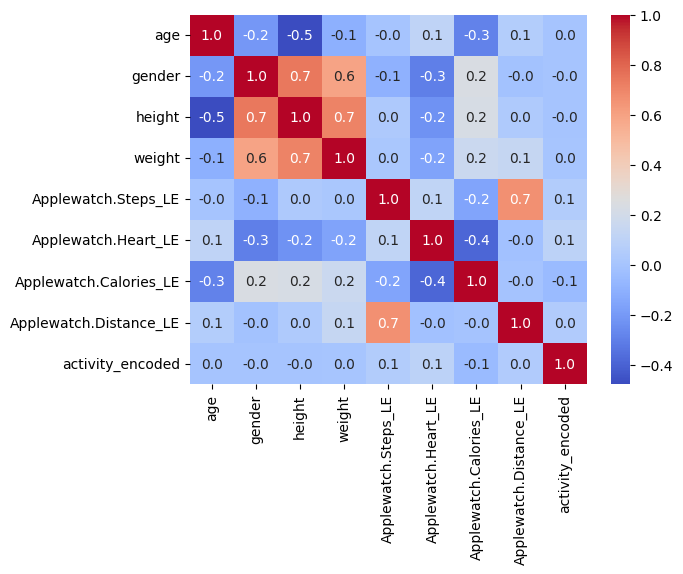

In [36]:
sns.heatmap(aw_df_1.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.show()

In [37]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
aw_df_1 = pd.DataFrame(ct.fit_transform(aw_df_1), 
                            columns=[ 'gender_1','gender_2', 'age','height', 'weight', 'Applewatch.Steps_LE',
       'Applewatch.Heart_LE', 'Applewatch.Calories_LE',
       'Applewatch.Distance_LE', 'activity_encoded'])
aw_df_1

,gender_1,gender_2,age,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,activity_encoded
0,0.0,1.0,20.0,168.0,65.4,10.771429,78.531302,0.344533,0.008327,0.0
1,0.0,1.0,20.0,168.0,65.4,11.475325,78.453390,3.287625,0.008896,0.0
2,0.0,1.0,20.0,168.0,65.4,12.179221,78.540825,9.484000,0.009466,0.0
3,0.0,1.0,20.0,168.0,65.4,12.883117,78.628260,10.154556,0.010035,0.0
4,0.0,1.0,20.0,168.0,65.4,13.587013,78.715695,10.825111,0.010605,0.0
...,...,...,...,...,...,...,...,...,...,...
3651,1.0,0.0,46.0,157.5,71.4,163.000000,157.250000,0.701500,0.075200,3.0
3652,1.0,0.0,46.0,157.5,71.4,6.666667,157.307692,0.701500,0.075475,3.0
3653,1.0,0.0,46.0,157.5,71.4,6.750000,156.250000,0.732000,0.075695,3.0
3654,1.0,0.0,46.0,157.5,71.4,6.791667,158.090909,0.612500,0.077270,3.0


In [125]:
# classification model

In [149]:
x = aw_df_1.iloc[:,:-1]
y = aw_df_1.iloc[:,-1:]

In [127]:
x

,gender_1,gender_2,age,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE
0,0.0,1.0,20.0,168.0,65.4,10.771429,78.531302,0.344533,0.008327
1,0.0,1.0,20.0,168.0,65.4,11.475325,78.453390,3.287625,0.008896
2,0.0,1.0,20.0,168.0,65.4,12.179221,78.540825,9.484000,0.009466
3,0.0,1.0,20.0,168.0,65.4,12.883117,78.628260,10.154556,0.010035
4,0.0,1.0,20.0,168.0,65.4,13.587013,78.715695,10.825111,0.010605
...,...,...,...,...,...,...,...,...,...
3651,1.0,0.0,46.0,157.5,71.4,163.000000,157.250000,0.701500,0.075200
3652,1.0,0.0,46.0,157.5,71.4,6.666667,157.307692,0.701500,0.075475
3653,1.0,0.0,46.0,157.5,71.4,6.750000,156.250000,0.732000,0.075695
3654,1.0,0.0,46.0,157.5,71.4,6.791667,158.090909,0.612500,0.077270


In [128]:
y

,activity_encoded
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3651,3.0
3652,3.0
3653,3.0
3654,3.0


In [129]:
# Test Train Split

In [150]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [151]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [132]:
# Logistics Regression

In [133]:
from sklearn.linear_model import LogisticRegression
Logistics_classifier = LogisticRegression()
Logistics_classifier.fit(x_train_scaled, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [134]:
y_train_pred = Logistics_classifier.predict(x_train_scaled)
y_pred = Logistics_classifier.predict(x_test_scaled)

In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[130  18  12  19   6   6]
 [ 56  24  23  27   7   7]
 [ 52  28  12  69   0   3]
 [ 53   0  11  85   0   4]
 [ 66  28  10  14   5   4]
 [ 83  13   8  26   0   5]]


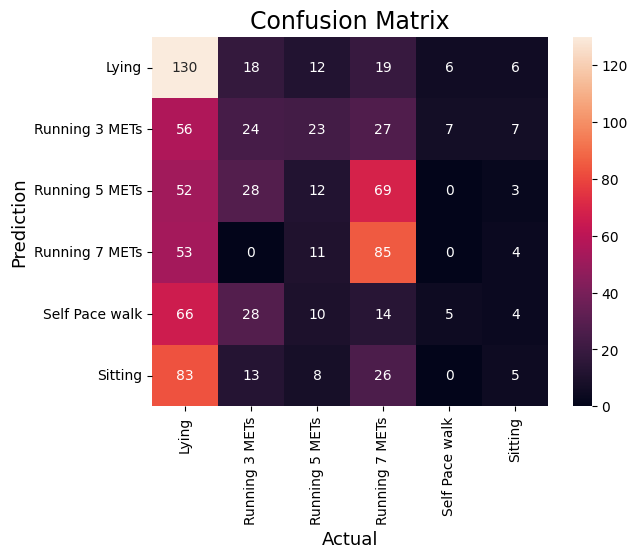

In [136]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=activity_df.activity_trimmed.values,
            yticklabels=activity_df.activity_trimmed.values)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.30      0.68      0.41       191
         1.0       0.22      0.17      0.19       144
         2.0       0.16      0.07      0.10       164
         3.0       0.35      0.56      0.43       153
         4.0       0.28      0.04      0.07       127
         5.0       0.17      0.04      0.06       135

    accuracy                           0.29       914
   macro avg       0.25      0.26      0.21       914
weighted avg       0.25      0.29      0.22       914



In [138]:
activity_df

,activity_encoded,activity_trimmed
0,0,Lying
26,1,Running 3 METs
45,2,Running 5 METs
63,3,Running 7 METs
10,4,Self Pace walk
5,5,Sitting


In [139]:
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'Logistics train accuracy score is {accuracy_score(y_train, y_train_pred).round(5)}')
print(f'Logsitics test accuracy score is {accuracy_score(y_test, y_pred).round(5)}')

Logistics train accuracy score is 0.28264
Logsitics test accuracy score is 0.28556


In [140]:
# decision tree

In [141]:
# def decision_tree():
from sklearn.tree import DecisionTreeClassifier
Decision_Tree_classifier = DecisionTreeClassifier()
Decision_Tree_classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [142]:
y_train_pred = Decision_Tree_classifier.predict(x_train_scaled)
y_pred = Decision_Tree_classifier.predict(x_test_scaled)

In [143]:
y_train, y_train_pred

(      activity_encoded
 37                 1.0
 2996               4.0
 2368               2.0
 3593               5.0
 1700               5.0
 ...                ...
 835                4.0
 3264               3.0
 1653               5.0
 2607               0.0
 2732               2.0
 
 [2742 rows x 1 columns],
 array([1., 4., 2., ..., 5., 0., 2.]))

In [156]:
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
cm = confusion_matrix(y_test, y_pred)
print(cm)
Decision_Tree_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'train Decision Tree accuracy score is {accuracy_score(y_train, y_train_pred)}')
print(f'test Decision Tree accruacy score is {Decision_Tree_classifier_accuracy_score}')

[[122  21  10  13   7  18]
 [ 22 102   8   2   8   2]
 [ 10   9 122  10   7   6]
 [  3   2  21 114   1  12]
 [ 10   6   5   1  95  10]
 [ 31   5  13   7  10  69]]
train Decision Tree accuracy score is 1.0
test Decision Tree accruacy score is 0.6827133479212254


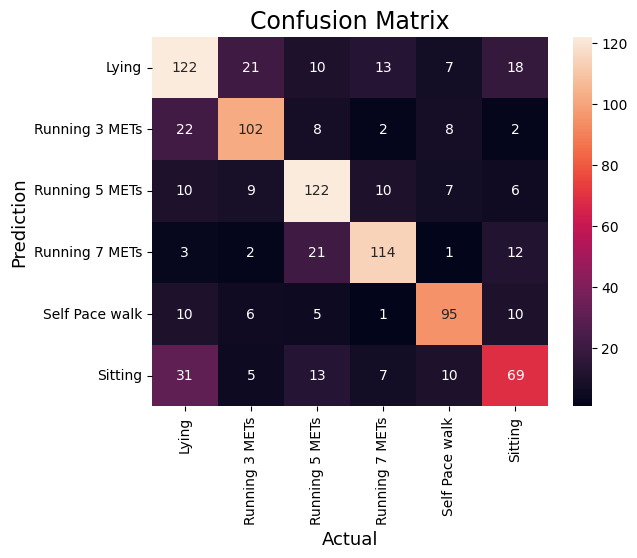

In [145]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=activity_df.activity_trimmed.values,
            yticklabels=activity_df.activity_trimmed.values)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

[Text(0.5, 0.9, 'x[6] <= 1.325\ngini = 0.83\nsamples = 2742\nvalue = [596, 428, 439, 460, 402, 417]'),
 Text(0.25, 0.7, 'x[6] <= 0.496\ngini = 0.824\nsamples = 2428\nvalue = [589, 427, 352, 269, 391, 400]'),
 Text(0.125, 0.5, 'x[5] <= -0.203\ngini = 0.818\nsamples = 2095\nvalue = [552, 324, 253, 225, 379, 362]'),
 Text(0.0625, 0.3, 'x[5] <= -0.384\ngini = 0.812\nsamples = 1477\nvalue = [383, 256, 207, 105, 320, 206]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'x[2] <= -0.657\ngini = 0.797\nsamples = 618\nvalue = [169, 68, 46, 120, 59, 156]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'x[5] <= -0.214\ngini = 0.772\nsamples = 333\nvalue = [37, 103, 99, 44, 12, 38]'),
 Text(0.3125, 0.3, 'x[5] <= -0.355\ngini = 0.713\nsamples = 176\nvalue = [11, 81, 38, 15, 10, 21]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'x[8] <= -0.205\ngini = 

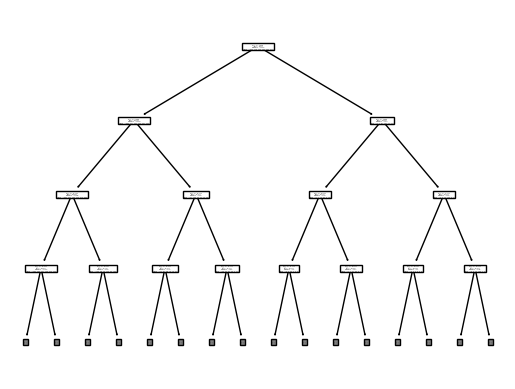

In [148]:
from sklearn.tree import plot_tree
plot_tree(Decision_Tree_classifier)

In [163]:
from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.637146503928842


In [59]:
# Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest_classifier = RandomForestClassifier()
Random_Forest_classifier.fit(x_train_scaled, y_train)

/tmp/ipykernel_33/3807192085.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Random_Forest_classifier.fit(x_train_scaled, y_train)


RandomForestClassifier()

In [161]:
y_train_pred = Random_Forest_classifier.predict(x_train_scaled)
y_pred = Random_Forest_classifier.predict(x_test_scaled)

In [162]:
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
cm = confusion_matrix(y_test, y_pred)
# print(cm)
Random_Forest_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'Train random forest accuracy score is {accuracy_score(y_train, y_train_pred)}')
print(f'Test random forest accruacy score is {Random_Forest_classifier_accuracy_score}')

Train random forest accuracy score is 1.0
Test random forest accruacy score is 0.7833698030634574


In [166]:
from sklearn.model_selection import GridSearchCV

dt_classifier = RandomForestClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(x_train_scaled, y_train.values.ravel())

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'criterion': 'gini'}
Best Score: 0.7622153085237925


In [63]:
# classification model

In [90]:
aw_df.columns

Index(['age', 'gender', 'height', 'weight', 'Applewatch.Steps_LE',
       'Applewatch.Heart_LE', 'Applewatch.Calories_LE',
       'Applewatch.Distance_LE', 'EntropyApplewatchHeartPerDay_LE',
       'EntropyApplewatchStepsPerDay_LE', 'RestingApplewatchHeartrate_LE',
       'CorrelationApplewatchHeartrateSteps_LE',
       'NormalizedApplewatchHeartrate_LE', 'ApplewatchIntensity_LE',
       'SDNormalizedApplewatchHR_LE', 'ApplewatchStepsXDistance_LE',
       'activity_encoded'],
      dtype='object')

In [105]:
x = aw_df.iloc[:,:-1]
y = aw_df.iloc[:,-1:]

In [106]:
x

,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.000000,1.000000,19.531302,0.138520,1.000000,0.089692
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.000000,1.000000,19.453390,0.137967,1.000000,0.102088
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.000000,1.000000,19.540825,0.138587,1.000000,0.115287
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.000000,1.000000,19.628260,0.139208,1.000000,0.129286
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.000000,0.982816,19.715695,0.139828,0.241567,0.144088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,46,0,157.5,71.4,163.000000,157.250000,0.701500,0.075200,6.162427,5.655310,79.421795,1.000000,77.828205,0.822898,7.270204,12.257600
3652,46,0,157.5,71.4,6.666667,157.307692,0.701500,0.075475,6.162427,5.655310,79.421795,1.000000,77.885897,0.823508,1.000000,0.503167
3653,46,0,157.5,71.4,6.750000,156.250000,0.732000,0.075695,6.162427,5.655310,79.421795,1.000000,76.828205,0.812325,1.000000,0.510941
3654,46,0,157.5,71.4,6.791667,158.090909,0.612500,0.077270,6.162427,5.655310,79.421795,1.000000,78.669114,0.831789,1.000000,0.524792


In [107]:
y

,activity_encoded
0,0
1,0
2,0
3,0
4,0
...,...
3651,3
3652,3
3653,3
3654,3


In [108]:
# Test Train Split

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [111]:
# Logistics Regression

In [112]:
from sklearn.linear_model import LogisticRegression
Logistics_classifier = LogisticRegression()
Logistics_classifier.fit(x_train_scaled, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [113]:
y_train_pred = Logistics_classifier.predict(x_train_scaled)
y_pred = Logistics_classifier.predict(x_test_scaled)

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[83 25 11 18 38 16]
 [34 29 21 13 39  8]
 [28 24 43 30 32  7]
 [29  0 23 88  4  9]
 [19 16 18 10 55  9]
 [59  3 19 20 17 17]]


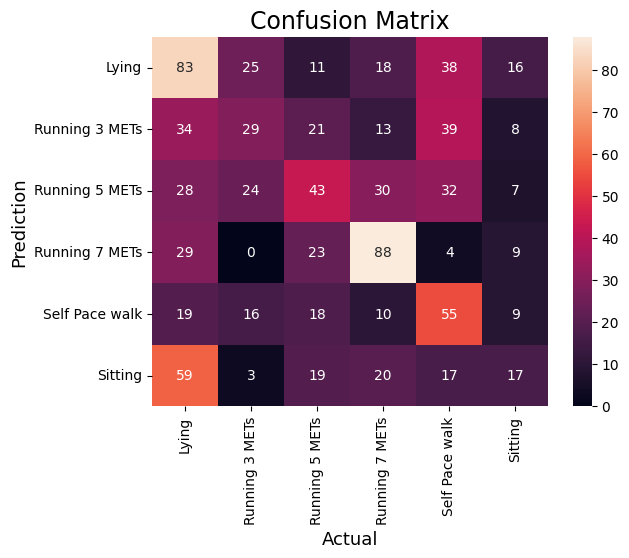

In [115]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=activity_df.activity_trimmed.values,
            yticklabels=activity_df.activity_trimmed.values)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.33      0.43      0.37       191
           1       0.30      0.20      0.24       144
           2       0.32      0.26      0.29       164
           3       0.49      0.58      0.53       153
           4       0.30      0.43      0.35       127
           5       0.26      0.13      0.17       135

    accuracy                           0.34       914
   macro avg       0.33      0.34      0.33       914
weighted avg       0.33      0.34      0.33       914



In [117]:
activity_df

,activity_encoded,activity_trimmed
0,0,Lying
26,1,Running 3 METs
45,2,Running 5 METs
63,3,Running 7 METs
10,4,Self Pace walk
5,5,Sitting


In [118]:
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'Logistics train accuracy score is {accuracy_score(y_train, y_train_pred).round(5)}')
print(f'Logsitics test accuracy score is {accuracy_score(y_test, y_pred).round(5)}')

Logistics train accuracy score is 0.37856
Logsitics test accuracy score is 0.34464


In [119]:
# decision tree

In [120]:
# def decision_tree():
from sklearn.tree import DecisionTreeClassifier
Decision_Tree_classifier = DecisionTreeClassifier()
Decision_Tree_classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [121]:
y_train_pred = Decision_Tree_classifier.predict(x_train_scaled)
y_pred = Decision_Tree_classifier.predict(x_test_scaled)

In [122]:
y_train, y_train_pred

(      activity_encoded
 37                   1
 2996                 4
 2368                 2
 3593                 5
 1700                 5
 ...                ...
 835                  4
 3264                 3
 1653                 5
 2607                 0
 2732                 2
 
 [2742 rows x 1 columns],
 array([1, 4, 2, ..., 5, 0, 2]))

In [123]:
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
cm = confusion_matrix(y_test, y_pred)
print(cm)
Decision_Tree_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'train Decision Tree accuracy score is {accuracy_score(y_train, y_train_pred)}')
print(f'test Decision Tree accruacy score is {Decision_Tree_classifier_accuracy_score}')

[[131  20  13   6   6  15]
 [ 15 105  12   1   6   5]
 [ 13   7 125   3   8   8]
 [  7   2  10 123   0  11]
 [ 14   7   4   0  99   3]
 [ 18  11  10   7  10  79]]
train Decision Tree accuracy score is 1.0
test Decision Tree accruacy score is 0.7242888402625821


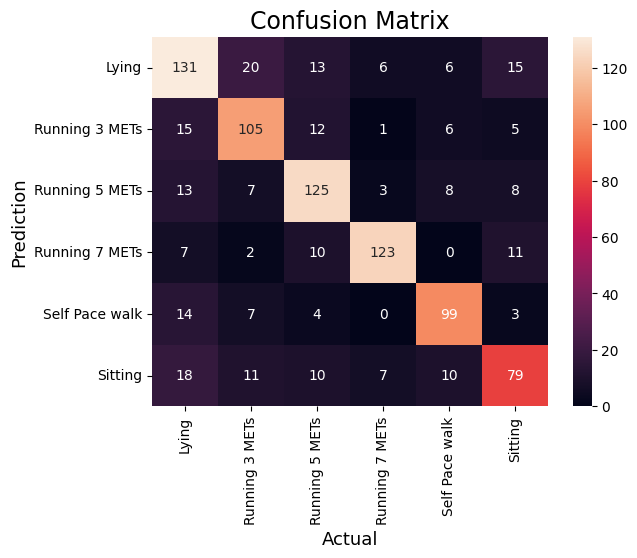

In [124]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=activity_df.activity_trimmed.values,
            yticklabels=activity_df.activity_trimmed.values)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()